In [308]:
!pip install opencv-python
!pip install PyQt5

     ---------------------------------------- 6.7/6.7 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 77.7/77.7 kB 865.1 kB/s eta 0:00:00


In [315]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


In [3]:
pd.read_csv('opt.csv',decimal=',', sep=';')

,Название,Полезность дисцпилины,Сложность дисциплины,Часы семинских занятий,Часы лекционных занятий,Часы самостоятельной работы,Количество практико-ориентированных работ,Актуальность,Количество теоретических работ
0,Информационные системы управления организацией,9,8,34,16,58,16,9,5
1,Экономика информационных систем,7,6,16,52,112,11,8,12
2,Архитектура организации,9,7,34,34,112,13,10,7
3,Управление информационно-технологическими прое...,8,9,16,34,130,12,10,10
4,Информационные технологии бизнес аналитики,8,7,16,34,22,9,9,6
5,Основы управления ИТ-сервисами,6,6,16,34,130,10,7,9
6,Основы управления информационными технологиями,7,5,34,34,112,15,8,7
7,Информационная безопасность,8,8,16,18,74,11,10,11
8,Цифровой бизнес,6,6,34,50,132,12,10,13
9,Мобильные технологии,8,9,16,18,74,8,9,8


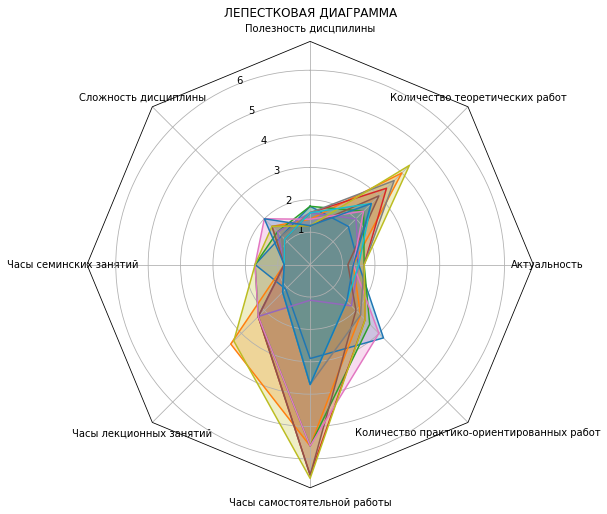

1.4285714285714286
()


In [337]:


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=0.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

class opt:
    '''
    Данный класс содержит следующие функции:
    for_two_criteria - функция свертки для двух основных критерий.
        в параметры задаются значения: 
            а1 (пока что), по умолчанию там значения от 1 до 0 с шагом 0.1
            criteria - номера столбцов критериев, по умолчанию там стоят первые два столбца
    for_all - свертка для всех критериев
        в параметры задаются значения:
            relevance - значения для каждого критерия
        '''
#     img = plt.imread('opt.jpg')
#     plt.imshow(img)
#     plt.show()

    def __init__(self, data, max_min = [0,1,0,0,0,0,0,0]):
        self.data = pd.read_csv(data, decimal=',', sep=';')
        self.max_min = max_min

    ''' 
    Исправить: 
        Добавить лепестковые диаграммы
    Вопрос:
        Что с нормализацией для всех сверток  - вопрос понятен
    '''
    def for_two_criteria(self, a1=[i/10 for i in range(10, -1, -1)], criteria = [1,2]):
            
        max_min=[]
        for i in criteria:
            for x in range(len(self.max_min)):
                if i == x+1:
                    max_min.append(self.max_min[x])
        
        a2 = [1 - i for i in a1]
        df = self.data.copy()
        names = df.iloc[:,0].tolist()
        criteria_names = df.columns.tolist()
        a,b=df.shape[0],df.shape[1]
        x1 = df.iloc[:,criteria[0]].tolist()
        x2 = df.iloc[:,criteria[1]].tolist()
        
        main_list = []
        
        for e in range(len(x1)):
            inner_list = []
            for i in range(len(a1)):
                if max_min[0] == 0 and max_min[1] == 0:
                    inner_list.append(a1[i]*x1[e] + a2[i]*x2[e])
                elif max_min[0] == 0 and max_min[1] == 1:
                    inner_list.append(a1[i]*x1[e] - a2[i]*x2[e])
                elif max_min[0] == 1 and max_min[1] == 0:
                    inner_list.append(-(a1[i]*x1[e]) + a2[i]*x2[e])
                elif max_min[0] == 1 and max_min[1] == 1:
                    inner_list.append(-(a1[i]*x1[e]) - a2[i]*x2[e])

            main_list.append(inner_list)
        df1 = pd.DataFrame(main_list)
        max_df = df1.max(axis=0)    
        df1.loc[a] = max_df
        
        text = print('Датафрейм, полученный после сверстки введенных данны:\n', df1)
        
        return(max_min)

     
    '''
        Добавить: отметку максимального значения из финального списка
        '''
    def for_all(self, relevance = [8,-6,7,2,3,5,9,4]):

        df = self.data.copy()
        main_list = []
        a,b=df.shape[0],df.shape[1]

        k = 1
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1
            
        df_values = pd.DataFrame(main_list)
        df_values = df_values.T
        min_values = df_values.min(axis=0).tolist()
        
        count_list = []
        for i in min_values:
            count_list.append(len(str(i)))
        
        normalized_list=[]
        for en, i in enumerate(count_list):
            normalized_list.append((relevance[en]/sum(relevance))/10**(i-1))

        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        collapse_list = []
        for i in range(len(df.iloc[:,1:])):
            collapse_list.append(df.iloc[i].tolist())
            
        for i in collapse_list:
            i.pop(0)
        
        multiply_list = []
        for i in collapse_list:
            inner_list=[]
            for en, e in enumerate(i):
                inner_list.append(e*normalized_list[en])
            multiply_list.append(inner_list)
        
        final_list = []
        for i in multiply_list:
            final_list.append(sum(i))
        df_rel = pd.DataFrame(final_list)
        text = print('Результаты сверстки по введенным данным:\n', df_rel)

        return(text)
    
    def ideal_dot(self, koef =1.1):
        max_min = self.max_min
        
        df = self.data.copy()
        a,b=df.shape[0],df.shape[1]
        max_df = df.max(axis=0)
       
        k = 1
        main_list = []
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1
            
        max_list=[]
        for en, i in enumerate(main_list):
            for x in range(len(max_min)):
                if en == x and max_min[en]==0:
                    max_list.append(max(i)*1.1)
                elif en == x and max_min[en]==1:
                    max_list.append(min(i)*0.9)
        sub_list = []
        s = 1
        while s<=b-1: 
            for en, el in enumerate(main_list):
                for i in range(len(max_min)):
                    if en == i and max_min[en]==0:
                        inner_list = list(df.iloc[:,s].map(lambda x: (max_list[i]-x)/max_list[i]))
                        sub_list.append(inner_list)
                    elif en == i and max_min[en]==1:
                        inner_list = list(df.iloc[:,s].map(lambda x: (1/((x-max_list[i])/max_list[i]))))
                        sub_list.append(inner_list)
                s+=1
                
                
        df_sub = pd.DataFrame(sub_list)
        df_sub = df_sub.T
        
        square_list = []
        o = 0
        while o<=a-1: 
            inner_list = list(df_sub.iloc[o].map(lambda x: x**2))
            square_list.append(inner_list)
            o+=1
        df_square = pd.DataFrame(square_list)
        sum_df = df_square.sum(axis=1)    

        
        return(sum_df)
        
    def benchmark(self, benchmark_list = [5,10,20,15,20,5,6,3]):        
        max_min = self.max_min
        df = self.data.copy()
        a,b=df.shape[0],df.shape[1]
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)

        k = 1
        main_list = []
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1

        control_list = []
        s = 1
        while s<=b-1: 
            for en, el in enumerate(main_list):
                for i in range(len(max_min)):
                    if en == i and max_min[en]==0:
                        inner_list = list(df.iloc[:,s].map(lambda x: (x/benchmark_list[i])))
                        control_list.append(inner_list)
                    elif en == i and max_min[en]==1:
                        inner_list = list(df.iloc[:,s].map(lambda x: (1/(x/benchmark_list[i]))))
                        control_list.append(inner_list)
                s+=1
                
        df_control = pd.DataFrame(control_list)
        df_control = df_control.T
        
        k = 0
        filter_list = []
        while k<=b+1: 
            filter_list.append(df_control.iloc[k].tolist())
            k+=1
                
        df_filter = pd.DataFrame(filter_list)
                
        final_list=[]
        for i in filter_list:
            if min(i) <= 1:
                final_list.append('NA')
            elif min(i) >= 1:
                final_list.append(min(i))
        
        max_list = [i for i in final_list if type(i) == float]

        data = [criteria_names,
                ('ЛЕПЕСТКОВАЯ ДИАГРАММА', filter_list
                )]

        N = len(data[0])
        theta = radar_factory(N, frame='polygon')                                     # polygon  !!!

        spoke_labels = data.pop(0)
        title, case_data = data[0]
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
#         ax.set_rgrids([0, 1, 2.0, 3.0, 4.0, 5.0, 6])
        ax.set_title(title,  position=(0.5, 1.1), ha='center')

        for d in case_data:
            line = ax.plot(theta, d)
            ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)

        plt.show()
        
        
        print(max(max_list))
                
        
        return()

        
o = opt('opt.csv')
# print(o.for_two_criteria())
# print(o.for_all())
# print(o.ideal_dot())
print(o.benchmark())